In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import random
facecolors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4:'purple', 5: 'black', 6: 'gray'}

In [2]:
# determine sector bounds when decomposing area along its width
def sector_boundaries_w(n, width, height):
    sector_w = width / n
    sector_bounds = []
    for i in range(n):
          x1 = i * sector_w
          y1 = 0
          x2 = (i + 1) * sector_w
          y2 = height
          sector_bounds.append((x1, y1, x2, y2))
    return sector_bounds


# determine sector bounds when decomposing area along its height
def sector_boundaries_h(n, width, height):
    sector_h = height / n
    sector_bounds = []
    for i in range(n):
          x1 = 0
          y1 = i * sector_h
          x2 = width
          y2 = (i + 1) * sector_h
          sector_bounds.append((x1, y1, x2, y2))
    return sector_bounds

In [3]:
# plot sector bounds
def visualize_sectors(total_area, sector_bounds = None, filename = None):
  fig, ax = plt.subplots()

  ax.add_patch(Rectangle((0, 0), total_area[0], total_area[1], facecolor='blue', alpha=0.2, edgecolor='black', linewidth=3))
  if sector_bounds is not None:
    for i, sector in enumerate(sector_bounds):
      ax.add_patch(Rectangle((sector[0], sector[1]), sector[2]-sector[0], sector[3]-sector[1], facecolor=facecolors[i], alpha=0.2, linewidth=0))

  #display plot
  plt.axis('scaled')
  if filename is not None:
    plt.savefig(filename)
  plt.show()

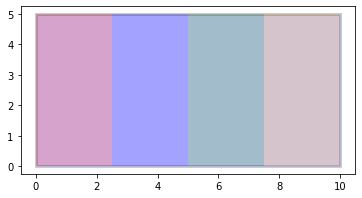

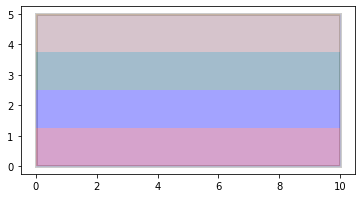

In [4]:
# generate visualizations of the simple area decompositions along x and y axes

n = 4
width = 10
height = 5

bnds = sector_boundaries_w(n, width, height)
visualize_sectors([width, height], bnds, filename='decomposition_width.png')


bnds = sector_boundaries_h(n, width, height)
visualize_sectors([width, height], bnds, filename='decomposition_height.png')

In [5]:
# MEASURE M3 and M4 metrics

# x_axis divide

M3s = []
M4s = []

for x in range(100000):
  positions = np.array([[np.random.random()*2.5 + i*2.5, np.random.random()*5] for i in range(4)])
  min_distances = []
  for i in range(4):
    distances = []
    for j in range(4):
      if i != j:
        distances.append(np.linalg.norm(positions[i] - positions[j]))
    min_distances.append(min(distances))
  M3s.append(max(min_distances))
  M4s.append(any(np.array(min_distances) > 5))

print(sum(M3s)/len(M3s))
print(sum(M4s)/len(M4s))

# y_axis divide
M3s = []
M4s = []


for x in range(100000):
  positions = np.array([[np.random.random()*10, (np.random.random()+i)*5/4] for i in range(4)])
  min_distances = []
  for i in range(4):
    distances = []
    for j in range(4):
      if i != j:
        distances.append(np.linalg.norm(positions[i] - positions[j]))
    min_distances.append(min(distances))
  M3s.append(max(min_distances))
  M4s.append(any(np.array(min_distances) > 5))

print(sum(M3s)/len(M3s))
print(sum(M4s)/len(M4s))
  

3.8114450994346507
0.08664
3.910327992725159
0.20012


In [6]:
# The other method of generating the area decomposition

def origin_points(n, width, height):
  return [[np.random.random()*width, np.random.random()*height] for _ in range(n)]

def generate_discrete_map(width, height):
  assert width == int(width)
  assert height == int(height)
  map = {}
  for i in range(width):
    for j in range(height):
      map[(i, j)]  = None
  return map

def voronoi_tesselation(map, origin_points):
  for key in map.keys():
    distances = np.linalg.norm(origin_points - np.array(key), axis=-1)
    closest = np.argmin(distances)
    map[key] = closest
  return map

def visualize_tesselation(n, width, height, map, filename = None):
  fig, ax = plt.subplots()

  ax.add_patch(Rectangle((0, 0), width, height, facecolor='blue', alpha=0.2, edgecolor='black', linewidth=3))
  for key in map.keys():
    ax.add_patch(Rectangle((key[0], key[1]), 1, 1, facecolor=facecolors[map[key]], alpha=0.4, linewidth=0))

  #display plot
  plt.axis('scaled')
  if filename is not None:
    plt.savefig(filename)
  plt.show()

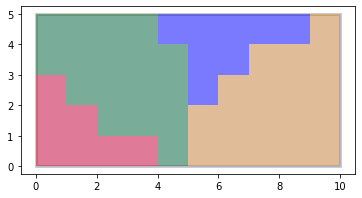

In [7]:
# An example of randomly generated decomposition

n = 4
width = 10
height = 5

points = origin_points(n, width, height)
map = generate_discrete_map(width, height)
map = voronoi_tesselation(map, points)
visualize_tesselation(n, width, height, map)

In [8]:
# code for calculating metrics for the area decomposition method

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

def generate_samples(map):
  points = []
  for i in range(4):
    bases = getKeysByValue(map, i)
    if len(bases) == 0:
      return None
    base = random.choice(bases)
    points.append([base[0]+np.random.random(), base[1]+np.random.random()])

  return points

In [9]:
# essentially inefficient random search for finding area decompositions with a better metric

def generate_and_evaluate_random_decomp(n, width, height):

  points = origin_points(n, width, height)
  map = generate_discrete_map(width, height)
  map = voronoi_tesselation(map, points)

  M3s = []
  M4s = []

  for x in range(1000):
    positions = np.array(generate_samples(map))
    if positions is None:
      return None, None, None
    min_distances = []
    for i in range(4):
      distances = []
      for j in range(4):
        if i != j:
          distances.append(np.linalg.norm(positions[i] - positions[j]))
      min_distances.append(min(distances))
    M3s.append(max(min_distances))
    M4s.append(any(np.array(min_distances) > 5))

  return map, sum(M3s)/len(M3s), sum(M4s)/len(M4s)

0/10
3.728594975661326


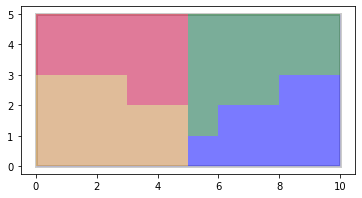

0.078


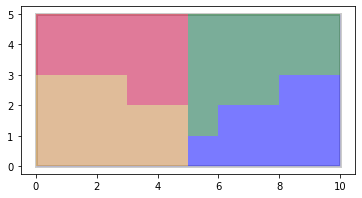

In [10]:
n = 4
width = 10
height = 5

m = 10 # set to a 1000

bestM3 = None
bestM3score = 1000
bestM4 = None
bestM4score = 1000

for i in range(m):
  if i%50 ==0:
    print(f"{i}/{m}")
  try:
    map, M3score, M4score = generate_and_evaluate_random_decomp(n, width, height)
  except:
    print("A weird error?")
    map = None
  if map is None:
    pass
  if M3score < bestM3score:
    bestM3score = M3score
    bestM3 = map
  if M4score < bestM4score:
    bestM4score = M4score
    bestM4 = map

print(bestM3score)
visualize_tesselation(n, width, height, bestM3)

print(bestM4score)
visualize_tesselation(n, width, height, bestM4)


3.7553003417151443
0.08079


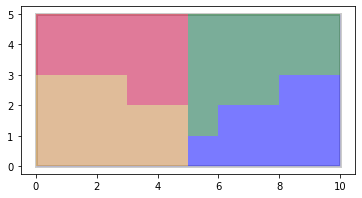

In [11]:
# Calculate metrics on full 100000 range

M3s = []
M4s = []

for x in range(100000):
  positions = np.array(generate_samples(bestM4))
  min_distances = []
  for i in range(4):
    distances = []
    for j in range(4):
      if i != j:
        distances.append(np.linalg.norm(positions[i] - positions[j]))
    min_distances.append(min(distances))
  M3s.append(max(min_distances))
  M4s.append(any(np.array(min_distances) > 5))

print(sum(M3s)/len(M3s))
print(sum(M4s)/len(M4s))
visualize_tesselation(n, width, height, bestM4, filename="M4optimized.png")
